<a href="https://colab.research.google.com/github/Nahmadid/sbinn/blob/main/old_papaer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exprement 1**

In [1]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import optax
import sys
import jax.nn as jnn
import pandas as pd
import random
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

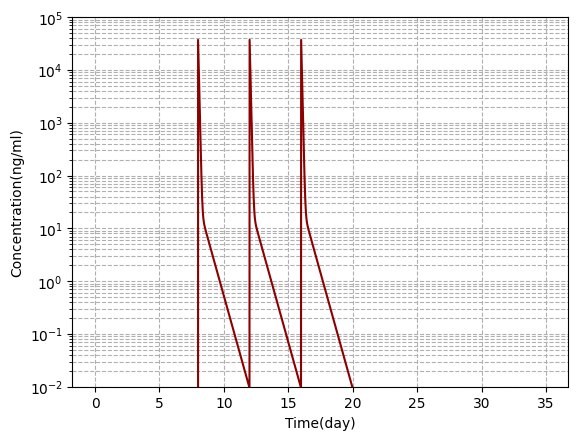

In [222]:

k10 = 0.868*24
k12 = 0.006*24
k21 = 0.0838*24

V1 = 810


num = 3500
dt = 0.01
A1 = []
A2 = []
A_10 = 0
A1.append(A_10)
A2.append(0)

for i in range(1, num+1):

    product = i * dt
    # if product.is_integer() and int(product) in [13,17,21]:
    if product.is_integer() and int(product) in [8,12,16]:
      mu = 3e+7
    else:
        mu = 0


    A1i = A1[i-1] - dt*(k10 + k12)*A1[i-1] + dt*k21*A2[i-1] + mu
    A2i = A2[i-1] + dt*k12*A1[i-1] - dt*k21*A2[i-1]
    A1.append(A1i)
    A2.append(A2i)



Cb_num = np.array(A1)
t = np.linspace(0, 35, 3501)
plt.plot(t, Cb_num/V1, color ='darkred', label='C_num')


plt.xlabel("Time(day)")
plt.ylabel("Concentration(ng/ml)")
plt.yscale('log')
plt.ylim(0.01, 100000 )
# plt.xlim(7, 20 )
# plt.ylim(10, 100000)
# plt.xlim(22, 23)
plt.grid()
plt.grid(True,which="both", ls="--")
plt.xscale('linear')


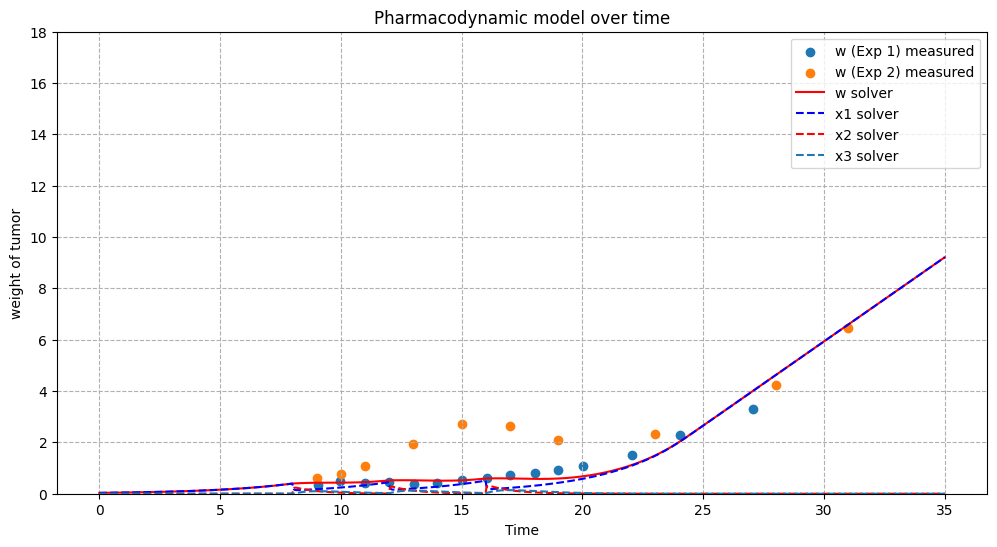

In [226]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#Expriment 1 , day 8-12-16
psi = 20
k1 = 0.968 #==> True
k2 = 6.29e-4 #==> True
lambda_0_exp1 =0.311#0.273 #0.311#*24 #==> True
lambda_1_exp1 = 0.656#0.814#0.656#*24 #==> True
w0_exp1 = 0.033


# #Expriment 2 , day 13 - 17 - 21
psi = 20
k1 = 0.968#==> True
k2 = 6.29e-4 #==> True
lambda_0_exp1 =0.273 #0.311#*24 #==> True
lambda_1_exp1 = 0.814#0.656#*24 #==> True
w0_exp1 = 0.055 #==> not true 0.055




# Defining the model
def pd(t, w0=w0_exp1, lambda_0=lambda_0_exp1, lambda_1=lambda_1_exp1, k1=k1, k2=k2):
    def func(y, t):
        t_dense = jnp.linspace(0, 35, 3501)
        c_values = Cb_num
        c = jnp.interp(t, t_dense, c_values)/V1
        # c = 0

        x1, x2, x3, x4 = y
        w = x1 + x2 + x3 + x4


        dx1_dt = lambda_0 * x1 * (1 + (lambda_0 / lambda_1 * w)**(psi))** (-1/psi) - k2 *c* x1
        dx2_dt = k2 *c* x1 - k1 * x2
        dx3_dt = k1 * (x2 - x3)
        dx4_dt = k1 * (x3 - x4)
        # dx5_dt = k1 * (x4 - x5)
        return [dx1_dt, dx2_dt, dx3_dt, dx4_dt]

    # Initial conditions
    y0 = [w0, 0, 0, 0]



    return odeint(func, y0, t)

t_label = np.array([9, 10, 11, 13, 15, 17, 19, 23, 28, 31])
w_real = np.array([0.6, 0.76, 1.08, 1.92, 2.72, 2.64, 2.08, 2.32, 4.24, 6.44])
# Time points
t_dense = np.linspace(0, 35, 3501)  # Assuming 10 time units, change as necessary

# Run model for experiment 1
y_dense = pd(t_dense)
# Plotting
w = y_dense[:, 0] + y_dense[:, 1]+ y_dense[:, 2]+ y_dense[:, 3]#+ y_dense[:, 4]
# w = y_dense[:, 0] + y_dense[:, 1]#+ y_dense[:, 4]
# w = y_dense[:, 0] + y_dense[:, 1]
plt.figure(figsize=(12, 6))
y_dense = pd(t_dense)
t_label = np.array([9, 10, 11, 13, 15, 17, 19, 23, 28, 31])
w_real = np.array([0.6, 0.76, 1.08, 1.92, 2.72, 2.64, 2.08, 2.32, 4.24, 6.44])

t_label1 = [9.033519553, 9.972067039, 10.98882682, 12.00558659, 13.02234637, 14, 15.01675978, 16.03351955, 17.01117318, 18.02793296, 19.00558659, 20.02234637, 22.05586592, 24.05027933, 27.06145251]
w_real1 = [0.352941176, 0.509803922, 0.431372549, 0.470588235, 0.392156863, 0.431372549, 0.549019608, 0.62745098, 0.745098039, 0.823529412, 0.941176471, 1.098039216, 1.490196078, 2.274509804, 3.294117647]
# w_real = np.array([0.6, 0.76, 1.08, 1.92, 2.72, 2.67, 2.15, 2.34, 4.22, 6.4])
# Plotting
# plt.figure(figsize=(12, 6))
plt.scatter(t_label1, w_real1, label='w (Exp 1) measured')
plt.scatter(t_label, w_real, label='w (Exp 2) measured')
# w = y_dense[:, 0] + y_dense[:, 1]+ y_dense[:, 2]+ y_dense[:, 3]
plt.plot(t_dense, w, '-',color='red', label='w solver')
plt.plot(t_dense, y_dense[:, 0], '--b', label='x1 solver')
plt.plot(t_dense, y_dense[:, 1], '--r', label='x2 solver')
plt.plot(t_dense, y_dense[:, 2], '--', label='x3 solver')
plt.ylim(0, 18)
plt.title('Pharmacodynamic model over time')
plt.xlabel('Time')
plt.ylabel('weight of tumor')
plt.legend()
plt.grid(True,which="both", ls="--")
plt.xscale('linear')
# plt.grid(which="both")
plt.show()



#**new korean**

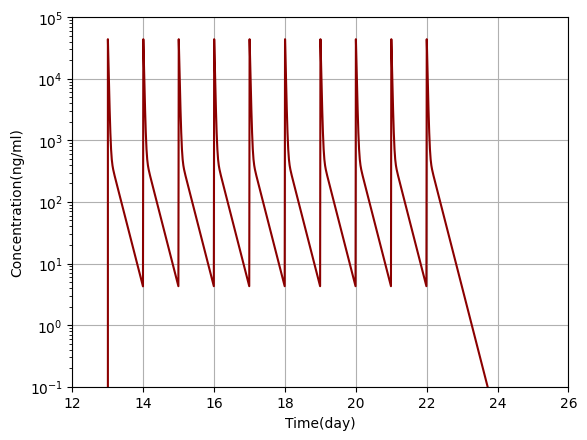

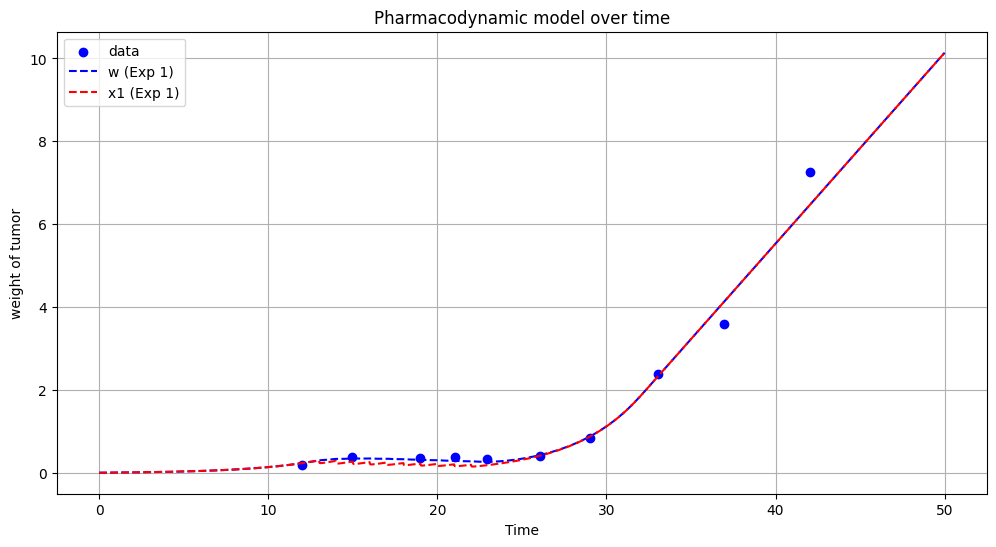

In [195]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
k10 = 1.6*24
k12 = 0.1699*24
k21 = 0.2353*24

V1 = 1028


num = 5000
dt = 0.01
A1 = []
A2 = []
A_10 = 0
A1.append(A_10)
A2.append(0)

for i in range(1, num+1):

    product = i * dt
    if product.is_integer() and int(product) in range(13, 23):
      mu = 4.5e+7
    else:
        mu = 0


    A1i = A1[i-1] - dt*(k10 + k12)*A1[i-1] + dt*k21*A2[i-1] + mu
    A2i = A2[i-1] + dt*k12*A1[i-1] - dt*k21*A2[i-1]
    A1.append(A1i)
    A2.append(A2i)


t_data= np.array([21.999, 22.000, 22.037, 22.162, 22.333])
data = np.array([19.198, 39396.228, 6619.183, 579.324, 154.226])

Cb_num = np.array(A1)
t = np.linspace(0, 50, 5001)
plt.plot(t, Cb_num/V1, color ='darkred', label='C_num')
plt.xlabel("Time(day)")
plt.ylabel("Concentration(ng/ml)")
plt.yscale('log')
plt.ylim(0.1, 100000 )
plt.xlim(12, 26 )
plt.grid()
plt.xscale('linear')


import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Constants from the table
k1 = 0.54379#*24
k2 =260070#/1028  ==>0.37847 , good fit : 278470
lambda_0_exp1 = 0.25
lambda_1_exp1 = 0.4603
w0_exp1 = 0.0121

psi = 20  # From the second image
# A = 621856.2845641
# B = 44378143.7042252
# kA = 0.5000000
# kB = 0.3882253
# Defining the model
def pd(t, w0=w0_exp1, lambda_0=lambda_0_exp1, lambda_1=lambda_1_exp1, k1=k1, k2=k2):
    def func(y, t):
        t_dose = np.arange(13, 23)
        t_dense = np.linspace(0, 50, 5001)
        c_values = Cb_num
        c = np.interp(t, t_dense, c_values)
        # c = np.sum([
        #     A * np.exp(-kA * (t - t_d))*np.heaviside(t - t_d, 0.001) + B * np.exp(-kB * (t - t_d))*np.heaviside(t - t_d, 0.001)
        #     for t_d in t_dose
        # ], axis=0)
        c=c*1e-9/V1
        # c=0

        # x1, x2, x3, x4 = y
        x1, x2 = y
        # w = x1 + x2 + x3 + x4
        w = x1 + x2

        dx1_dt = lambda_0 * x1 * (1 + (lambda_0 / lambda_1 * w)**(psi))** (-1/psi) - k2 *c* x1
        dx2_dt = k2 *c* x1 - k1 * x2
        # dx3_dt = k1 * (x2 - x3)
        # dx4_dt = k1 * (x3 - x4)
        return [dx1_dt, dx2_dt]#[dx1_dt, dx2_dt, dx3_dt, dx4_dt]

    # Initial conditions
    # y0 = [w0, 0, 0, 0]
    y0 = [w0, 0]


    return odeint(func, y0, t)

# Time points
t_dense = np.linspace(0, 50, 50001)  # Assuming 10 time units, change as necessary

# Run model for experiment 1
y_dense = pd(t_dense)
# t_label = np.array([9, 10, 11, 13, 15, 17, 19, 23, 28, 31])*24
# w_real = np.array([0.6, 0.76, 1.08, 1.92, 2.72, 2.64, 2.08, 2.32, 4.24, 6.44])
# w_real = np.array([0.6, 0.76, 1.08, 1.92, 2.72, 2.67, 2.15, 2.34, 4.22, 6.4])
# Plotting
w = y_dense[:, 0] + y_dense[:, 1]#+ y_dense[:, 2]+ y_dense[:, 3]
# w = y_dense[:, 0] + y_dense[:, 1]
plt.figure(figsize=(12, 6))
x_values = [
    11.993982745882200, 14.963922205762900, 18.994554329886700,
    21.021655865995700, 22.95447360972760, 26.04226781007970,
    29.012207269960400, 33.01926844598990, 36.95561677773650,
    42.023370618009100
]
y_values = [
    0.18924576641879700, 0.3909345122789480, 0.37624195463350500,
    0.3809910641754650, 0.35368368430919100, 0.41230550521777200,
    0.861096356933075, 2.3851152908829600, 3.598512778853960,
    7.257701680934830
]

plt.scatter(x_values, y_values, color='blue',label='data')
plt.plot(t_dense, w, '--b', label='w (Exp 1)')
# plt.title('Pharmacodynamic model over time')
# plt.xlabel('Time')
# plt.ylabel('weight of tumor')
# # plt.yscale('log')
# plt.legend()
# # plt.ylim(0, 10)
# plt.grid()
# plt.show()

# plt.figure(figsize=(12, 6))
plt.plot(t_dense, y_dense[:, 0], 'r--', label='x1 (Exp 1)')
# plt.plot(t_dense, y_dense[:, 2], '--', label='x2 (Exp 1)')
# plt.plot(t_dense, y_dense[:, 3], '--', label='x3 (Exp 1)')
# plt.ylim(0, 10)
plt.title('Pharmacodynamic model over time')
plt.xlabel('Time')
plt.ylabel('weight of tumor')
# plt.yscale('log')
plt.legend()
# plt.ylim(0, 10)
plt.grid()
plt.show()



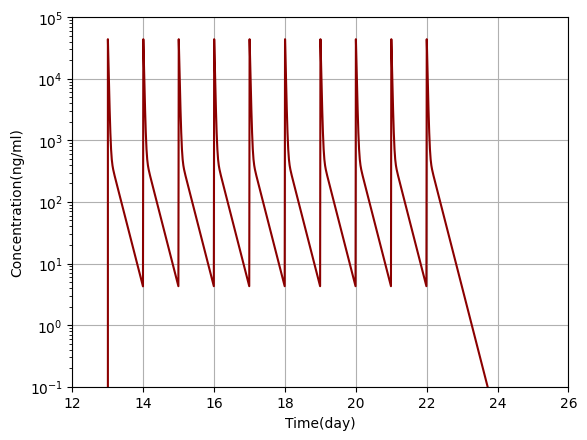

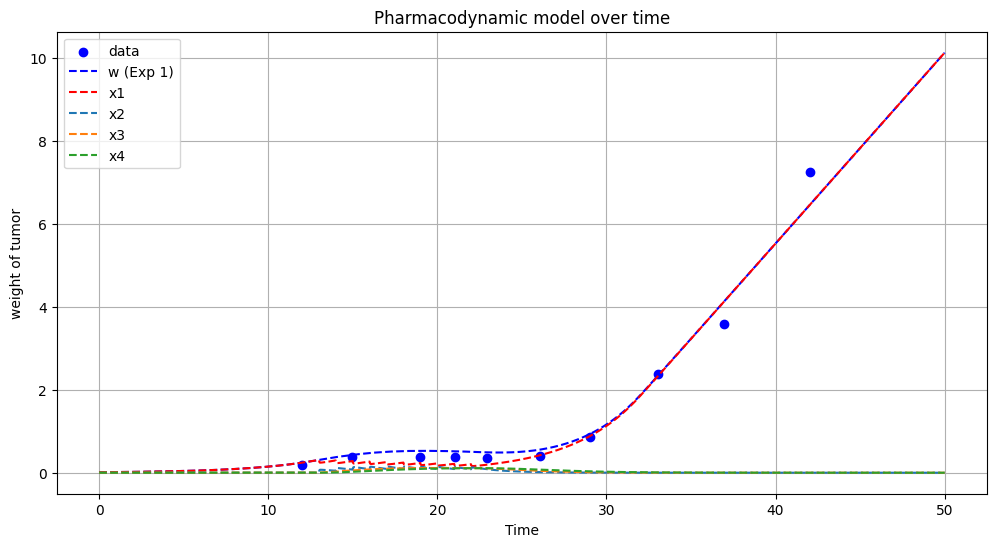

In [200]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
k10 = 1.6*24
k12 = 0.1699*24
k21 = 0.2353*24

V1 = 1028


num = 5000
dt = 0.01
A1 = []
A2 = []
A_10 = 0
A1.append(A_10)
A2.append(0)

for i in range(1, num+1):

    product = i * dt
    if product.is_integer() and int(product) in range(13, 23):
      mu = 4.5e+7
    else:
        mu = 0


    A1i = A1[i-1] - dt*(k10 + k12)*A1[i-1] + dt*k21*A2[i-1] + mu
    A2i = A2[i-1] + dt*k12*A1[i-1] - dt*k21*A2[i-1]
    A1.append(A1i)
    A2.append(A2i)


t_data= np.array([21.999, 22.000, 22.037, 22.162, 22.333])
data = np.array([19.198, 39396.228, 6619.183, 579.324, 154.226])

Cb_num = np.array(A1)
t = np.linspace(0, 50, 5001)
plt.plot(t, Cb_num/V1, color ='darkred', label='C_num')
plt.xlabel("Time(day)")
plt.ylabel("Concentration(ng/ml)")
plt.yscale('log')
plt.ylim(0.1, 100000 )
plt.xlim(12, 26 )
plt.grid()
plt.xscale('linear')


import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Constants from the table
k1 = 0.54379#*24
k2 =260070#/1028  ==>0.37847 , good fit : 278470
lambda_0_exp1 = 0.25
lambda_1_exp1 = 0.4603
w0_exp1 = 0.0121

psi = 20  # From the second image
# A = 621856.2845641
# B = 44378143.7042252
# kA = 0.5000000
# kB = 0.3882253
# Defining the model
def pd(t, w0=w0_exp1, lambda_0=lambda_0_exp1, lambda_1=lambda_1_exp1, k1=k1, k2=k2):
    def func(y, t):
        t_dose = np.arange(13, 23)
        t_dense = np.linspace(0, 50, 5001)
        c_values = Cb_num
        c = np.interp(t, t_dense, c_values)
        # c = np.sum([
        #     A * np.exp(-kA * (t - t_d))*np.heaviside(t - t_d, 0.001) + B * np.exp(-kB * (t - t_d))*np.heaviside(t - t_d, 0.001)
        #     for t_d in t_dose
        # ], axis=0)
        c=c*1e-9/V1
        # c=0

        x1, x2, x3, x4 = y
        # x1, x2 = y
        w = x1 + x2 + x3 + x4
        # w = x1 + x2

        dx1_dt = lambda_0 * x1 * (1 + (lambda_0 / lambda_1 * w)**(psi))** (-1/psi) - k2 *c* x1
        dx2_dt = k2 *c* x1 - k1 * x2
        dx3_dt = k1 * (x2 - x3)
        dx4_dt = k1 * (x3 - x4)
        return [dx1_dt, dx2_dt, dx3_dt, dx4_dt]

    # Initial conditions
    y0 = [w0, 0, 0, 0]
    # y0 = [w0, 0]


    return odeint(func, y0, t)

# Time points
t_dense = np.linspace(0, 50, 50001)  # Assuming 10 time units, change as necessary

# Run model for experiment 1
y_dense = pd(t_dense)
# t_label = np.array([9, 10, 11, 13, 15, 17, 19, 23, 28, 31])*24
# w_real = np.array([0.6, 0.76, 1.08, 1.92, 2.72, 2.64, 2.08, 2.32, 4.24, 6.44])
# w_real = np.array([0.6, 0.76, 1.08, 1.92, 2.72, 2.67, 2.15, 2.34, 4.22, 6.4])
# Plotting
w = y_dense[:, 0] + y_dense[:, 1]+ y_dense[:, 2]+ y_dense[:, 3]
# w = y_dense[:, 0] + y_dense[:, 1]
plt.figure(figsize=(12, 6))
x_values = [
    11.993982745882200, 14.963922205762900, 18.994554329886700,
    21.021655865995700, 22.95447360972760, 26.04226781007970,
    29.012207269960400, 33.01926844598990, 36.95561677773650,
    42.023370618009100
]
y_values = [
    0.18924576641879700, 0.3909345122789480, 0.37624195463350500,
    0.3809910641754650, 0.35368368430919100, 0.41230550521777200,
    0.861096356933075, 2.3851152908829600, 3.598512778853960,
    7.257701680934830
]

plt.scatter(x_values, y_values, color='blue',label='data')
plt.plot(t_dense, w, '--b', label='w (Exp 1)')
# plt.title('Pharmacodynamic model over time')
# plt.xlabel('Time')
# plt.ylabel('weight of tumor')
# # plt.yscale('log')
# plt.legend()
# # plt.ylim(0, 10)
# plt.grid()
# plt.show()

# plt.figure(figsize=(12, 6))
plt.plot(t_dense, y_dense[:, 0], 'r--', label='x1')
plt.plot(t_dense, y_dense[:, 1], '--', label='x2')
plt.plot(t_dense, y_dense[:, 2], '--', label='x3')
plt.plot(t_dense, y_dense[:, 3], '--', label='x4')
# plt.ylim(0, 10)
plt.title('Pharmacodynamic model over time')
plt.xlabel('Time')
plt.ylabel('weight of tumor')
# plt.yscale('log')
plt.legend()
# plt.ylim(0, 10)
plt.grid()
plt.show()



#**Validation**